In [1]:
%load_ext autoreload
%autoreload 2
import eval_models
import pandas as pd
import numpy as np
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_art,y_art,X_dig,y_dig= eval_models.get_data()
X_dig_train,X_dig_test,y_dig_train,y_dig_test=train_test_split(X_dig,y_dig,stratify=y_dig,test_size=0.25)

## No standarization at all

In [3]:
RF = RandomForestClassifier(n_jobs=-1, max_depth=6)
feat_select = BorutaPy(RF, n_estimators='auto', verbose=0)
feat_select.fit(X_dig_train.values,y_dig_train)
X_dig_train_boruta=X_dig_train.iloc[:,feat_select.support_]
X_dig_test_boruta=X_dig_test.iloc[:,feat_select.support_]

In [4]:
noscaling_res=eval_models.get_models_ba(X_dig_train_boruta,
                              X_dig_test_boruta,
                              y_dig_train,
                              y_dig_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_dig_train_boruta.columns))

LogisticRegression 0.974
RandomForestClassifier 0.9787
AdaBoostClassifier 0.9573
LGBMClassifier 0.9747
XGBClassifier 0.976
no of features: 1155


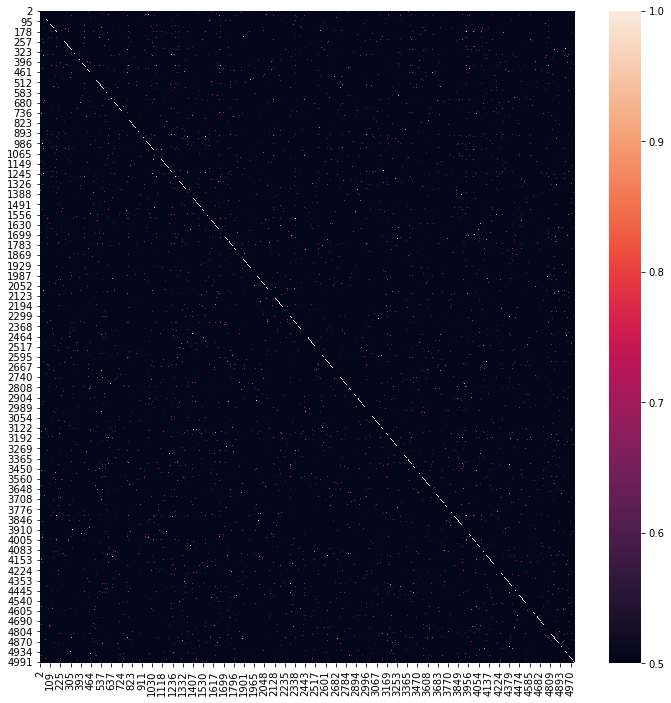

In [6]:
X_train_no_corr=eval_models.delete_corr(X_dig_train_boruta,verbose=True)

In [7]:
noscaling_res_cor=eval_models.get_models_ba(X_train_no_corr,
                              X_dig_test_boruta,
                              y_dig_train,
                              y_dig_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_train_no_corr.columns))

LogisticRegression 0.9727
RandomForestClassifier 0.9767
AdaBoostClassifier 0.9573
LGBMClassifier 0.9747
XGBClassifier 0.976
no of features: 1109


## Standarization after Boruta

In [8]:
X_dig_train_boruta_sc,X_dig_test_boruta_sc=eval_models.standarize(X_dig_train_boruta,X_dig_test_boruta)

In [9]:
X_train_no_corr2=eval_models.delete_corr(X_dig_train_boruta_sc)

In [10]:
noscaling_res_cor=eval_models.get_models_ba(X_train_no_corr2,
                              X_dig_test_boruta_sc,
                              y_dig_train,
                              y_dig_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_train_no_corr2.columns))

LogisticRegression 0.974
RandomForestClassifier 0.9767
AdaBoostClassifier 0.9573
LGBMClassifier 0.976
XGBClassifier 0.976
no of features: 1109


## Standarization before Boruta

In [11]:
X_dig_train_sc,X_dig_test_sc=eval_models.standarize(X_dig_train,X_dig_test)

In [12]:
### (suggested max_depth between 3 and 7) podobno
RF = RandomForestClassifier(n_jobs=-1, max_depth=7)
feat_select = BorutaPy(RF, n_estimators='auto', verbose=0)
feat_select.fit(X_dig_train_sc.values,y_dig_train)
X_dig_train_sc_boruta=X_dig_train_sc.iloc[:,feat_select.support_]
X_dig_test_sc_boruta=X_dig_test_sc.iloc[:,feat_select.support_]

In [13]:
scaled_res=eval_models.get_models_ba(X_dig_train_sc_boruta,
                              X_dig_test_sc_boruta,
                              y_dig_train,
                              y_dig_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_dig_train_sc_boruta.columns))

LogisticRegression 0.974
RandomForestClassifier 0.9753
AdaBoostClassifier 0.9573
LGBMClassifier 0.9733
XGBClassifier 0.9807
no of features: 1150


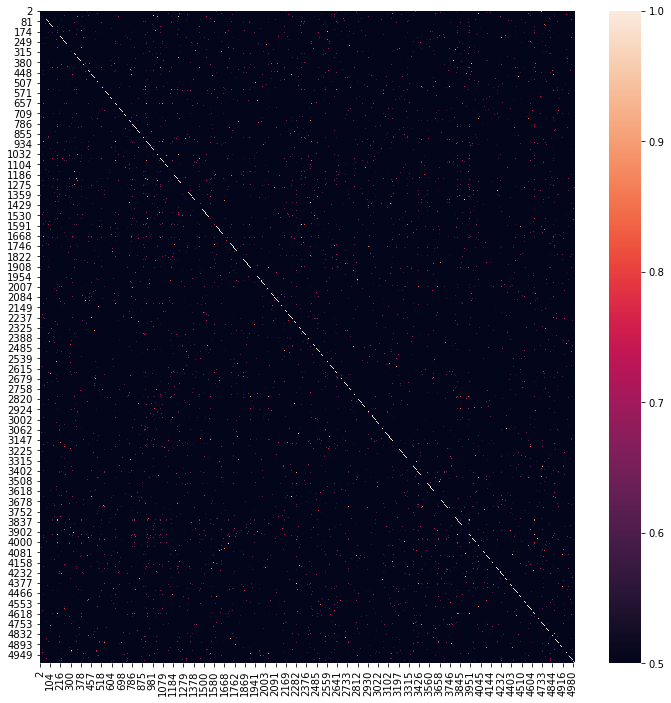

In [14]:
X_dig_train_sc_no_corr=eval_models.delete_corr(X_dig_train_sc_boruta,verbose=True)

In [17]:
scaled_res_cor=eval_models.get_models_ba(X_dig_train_sc_no_corr,
                              X_dig_test_sc_boruta,
                              y_dig_train,
                              y_dig_test,
                              logistic_args={"max_iter":1000}
                             )
print("no of features:",len(X_dig_train_sc_no_corr.columns))

LogisticRegression 0.9747
RandomForestClassifier 0.9767
AdaBoostClassifier 0.9573
LGBMClassifier 0.9733
XGBClassifier 0.9807
no of features: 1104
